In [12]:
#DATA IN BRIEF (opis baze)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
import seaborn as sns
from numpy import linalg as LA
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from pandas import DataFrame
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
from scipy.stats import skew, kurtosis

In [3]:
df=pd.read_csv("Downloads/housing.csv",encoding="latin1")

In [4]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [5]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [22]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [48]:
df.columns
print(df.isnull().sum()) 

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [14]:
#Descriptive Statistics

In [24]:
#1)Present summary statistics (mean, median, standard deviation, etc.).

In [45]:
medv=df["MEDV"]
print("Opisne statistike za MEDV (medijalna cena kuće):")
print("\nMinimum:", medv.min(),"$")
print("Srednja vrednost:", medv.mean(),"$")
print("Maksimum:", medv.max(),"$")
print("Medijana:", medv.median(),"$")
print("Standardna devijacija:", medv.std(),"$",)
print("Varijansa:", medv.var())
print("Asimetrija (Skewness):", round(skew(medv)))
print("Koeficijent varijacije (CV):", round((medv.std() / medv.mean()) * 100, 2), "%")
print("Broj kuca koji imaju upisanu vrednost: ", medv.count())
print("Raspon podataka je: ", medv.max()-medv.min())

Opisne statistike za MEDV (medijalna cena kuće):

Minimum: 105000.0 $
Srednja vrednost: 454342.9447852761 $
Maksimum: 1024800.0 $
Medijana: 438900.0 $
Standardna devijacija: 165340.27765266786 $
Varijansa: 27337407414.2613
Asimetrija (Skewness): 1
Koeficijent varijacije (CV): 36.39 %
Broj kuca koji imaju upisanu vrednost:  489
Raspon podataka je:  919800.0


In [49]:
#2)Use appropriate visualizations (histograms, boxplots, correlation matrices).

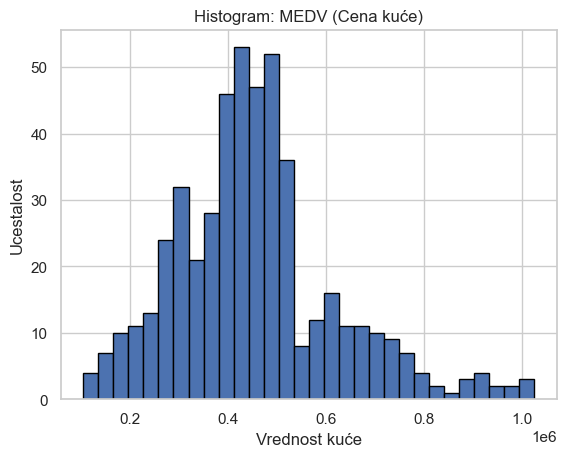

In [6]:
import matplotlib.pyplot as plt

plt.hist(df["MEDV"], bins=30, edgecolor='black')
plt.title("Histogram: MEDV (Cena kuće)")
plt.xlabel("Vrednost kuće")
plt.ylabel("Ucestalost")
plt.grid(True)
plt.show()

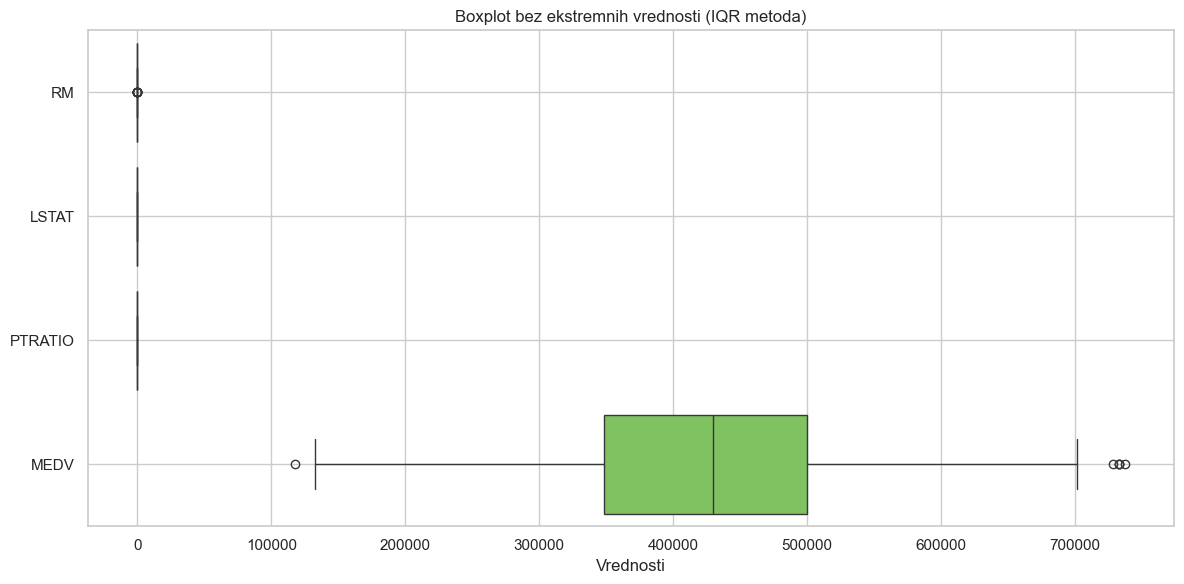

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clean = df.copy()

for col in df_clean.select_dtypes(include='number').columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, orient='h', palette='viridis')
plt.title("Boxplot bez ekstremnih vrednosti (IQR metoda)")
plt.xlabel("Vrednosti")
plt.grid(True)
plt.tight_layout()
plt.show()

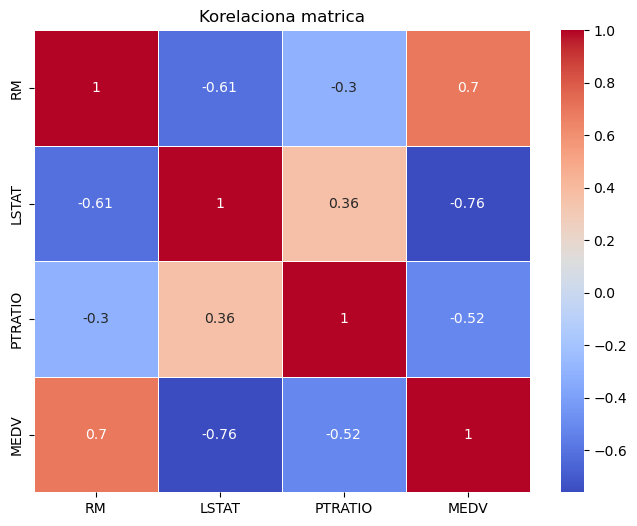

In [5]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(8, 6))
corre = df.corr()
sns.heatmap(corre, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelaciona matrica")
plt.show()


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definisanje ulaznih i izlaznih podataka
X = df[['RM', 'LSTAT', 'PTRATIO']]  # Ulazne promenljive
y = df['MEDV']                      # Ciljna promenljiva

# Podela na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kreiranje i treniranje modela
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predikcija
y_pred = tree_model.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 6396165000.00
R² Score: 0.71


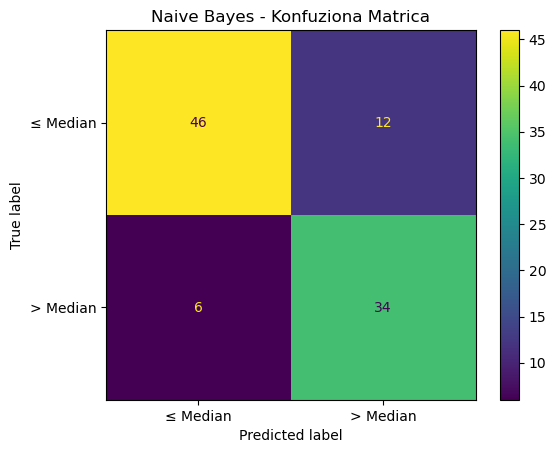

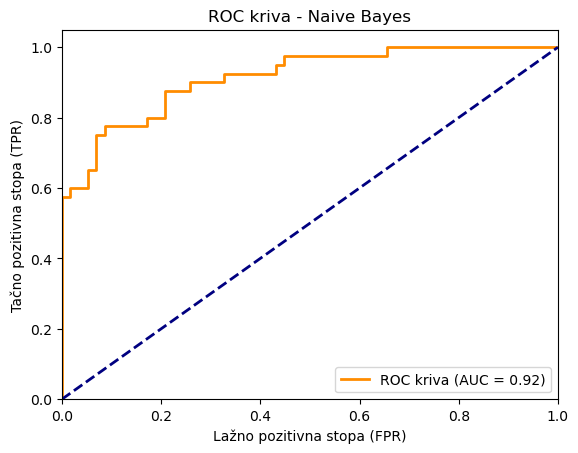

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Konfuziona matrica
cm = confusion_matrix(y_test_bayes, y_pred_bayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['≤ Median', '> Median'])
disp.plot()
plt.title("Naive Bayes - Konfuziona Matrica")
plt.show()

# ROC kriva
y_probs = nb.predict_proba(X_test_bayes)[:, 1]  # verovatnoće za klasu 1
fpr, tpr, thresholds = roc_curve(y_test_bayes, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC kriva (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Lažno pozitivna stopa (FPR)')
plt.ylabel('Tačno pozitivna stopa (TPR)')
plt.title('ROC kriva - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


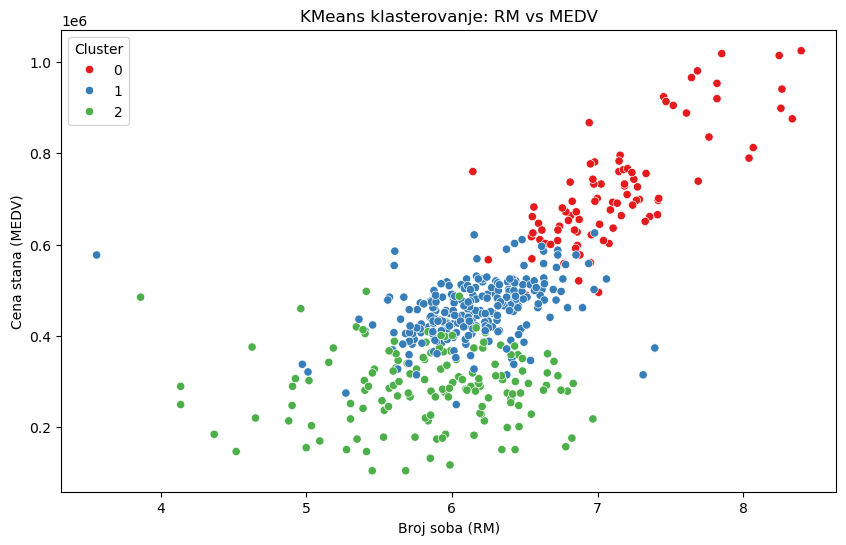

,RM,MEDV,LSTAT,PTRATIO
Cluster,,,,
0,7.131157,716855.056180,5.543258,16.349438
1,6.149727,456007.114625,10.626759,18.449802
2,5.856782,292542.857143,21.398367,19.943537


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "2"

# Odaberi relevantne kolone
X = df[["RM", "MEDV", "LSTAT", "PTRATIO"]]

# Standardizuj podatke
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Primeni KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Dodaj klastere u DataFrame
df["Cluster"] = clusters

# Vizualizacija: RM vs MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["RM"], y=df["MEDV"], hue=df["Cluster"], palette="Set1")
plt.title("KMeans klasterovanje: RM vs MEDV")
plt.xlabel("Broj soba (RM)")
plt.ylabel("Cena stana (MEDV)")
plt.show()
df.groupby("Cluster")[["RM", "MEDV", "LSTAT", "PTRATIO"]].mean()


Broj primera po kategoriji cene:
 PriceCategory
Niska cena      164
Visoka cena     163
Srednja cena    162
Name: count, dtype: int64

Prosečne vrednosti po kategorijama:
                      RM      LSTAT    PTRATIO           MEDV   Cluster
PriceCategory                                                         
Niska cena     5.907787  19.874329  19.646951  291579.878049  1.792683
Srednja cena   6.042302  11.919136  18.711728  440637.037037  1.098765
Visoka cena    6.771601   6.976626  17.185276  631726.380368  0.460123


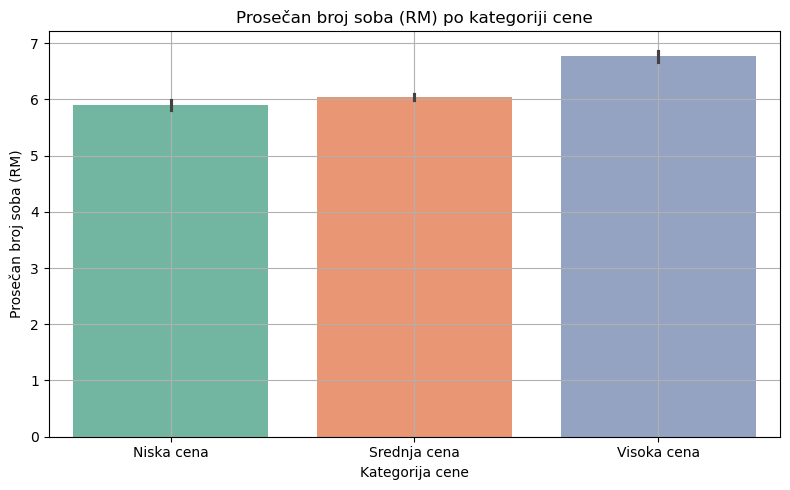

In [43]:
#GRUPISANJE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kreiranje kategorija cena pomoću kvantila (3 grupe sa približno jednakim brojem podataka)
df['PriceCategory'] = pd.qcut(df['MEDV'], q=3, labels=['Niska cena', 'Srednja cena', 'Visoka cena'])

# Prikaz broja primera po kategorijama
print("Broj primera po kategoriji cene:\n", df['PriceCategory'].value_counts())

# Prosečne vrednosti po kategoriji cene
print("\nProsečne vrednosti po kategorijama:\n", df.groupby('PriceCategory', observed=True).mean())

# Vizualizacija - prosečan broj soba (RM) po kategoriji cene
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='PriceCategory',
    y='RM',
    hue='PriceCategory',         # dodato zbog buduće verzije seaborn-a
    estimator='mean',
    palette='Set2',
    legend=False                 # isključena legenda jer je već prikazano na X-osi
)
plt.title('Prosečan broj soba (RM) po kategoriji cene')
plt.ylabel('Prosečan broj soba (RM)')
plt.xlabel('Kategorija cene')
plt.grid(True)
plt.tight_layout()
plt.show()

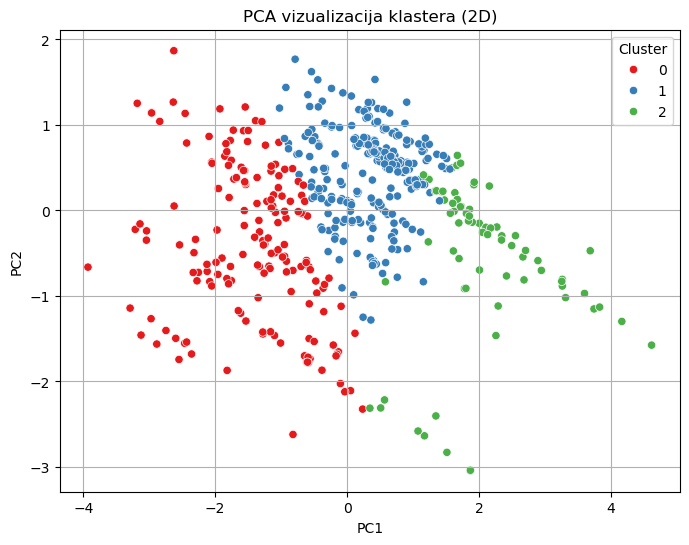

In [50]:
#PCA 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Pretpostavljamo da već postoji df['Cluster']
X_pca = df.drop(["MEDV", "PriceCategory", "Cluster"], axis=1, errors="ignore")
X_scaled_pca = StandardScaler().fit_transform(X_pca)

# PCA redukcija
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled_pca)

pca_df = pd.DataFrame(X_reduced, columns=["PC1", "PC2"])
pca_df["Cluster"] = df["Cluster"]

# Vizualizacija klastera
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set1")
plt.title("PCA vizualizacija klastera (2D)")
plt.grid(True)
plt.show()

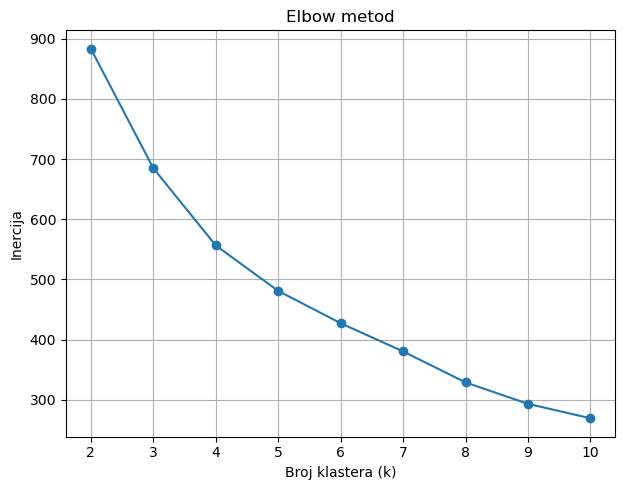

In [49]:
#elbow metod
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Podesi broj threadova da ukloni MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"
warnings.filterwarnings("ignore", category=UserWarning)

# Priprema podataka
X_elbow = df.drop(["MEDV", "PriceCategory", "Cluster"], axis=1, errors="ignore")
scaler_elbow = StandardScaler()
X_scaled_elbow = scaler_elbow.fit_transform(X_elbow)

# Elbow i Silhouette
inertia = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_elbow)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled_elbow, labels))

# Grafički prikaz
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow metod")
plt.xlabel("Broj klastera (k)")
plt.ylabel("Inercija")
plt.grid(True)


plt.tight_layout()
plt.show()